# Example Notebook

In [1]:
import numpy as np
from scipy import stats
from plasso import PliableLasso
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as graph
import seaborn as sns

In [2]:
# Setup
def create_dataset(n, p, k):
    beta_0 = 0
    theta_0 = np.zeros(k)

    beta = np.zeros(p)
    beta[1:5] = [4, -2, 3, 2]
    print(beta)

    theta = np.zeros((p, k))
    theta[3, 0] = 2.0
    theta[4, 1] = -2.0
    print(theta)

    z = stats.bernoulli(p=0.5).rvs(size=(n, k))
    print(z.shape)

    x = stats.norm().rvs(size=(n, p))
    print(x.shape)

    y = x[:, 1] * beta[1]
    y += x[:, 2] * beta[2]
    y += x[:, 3] * (beta[3] + 2*z[:, 0])
    y += x[:, 4] * (beta[4] - 2*z[:, 1])

    y_gt = y.copy()
    y += 0.5 * stats.norm().rvs(n)  # Add noise from paper
    print(y.shape)
    return x, z, y, y_gt

## Testing the Pliable Lasso

In [3]:
x, z, y, y_true = create_dataset(100000, 50, 4)
x_train, x_test, z_train, z_test, y_train, y_test, y_true_train, y_true_test = train_test_split(x, z, y, y_true, test_size=0.1)

print(x_train.shape, x_test.shape)

[ 0.  4. -2.  3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0. -2.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.

In [4]:
%%time
plasso = PliableLasso(min_lam=1e-1, fit_intercepts=False)
plasso.fit(x_train, z_train, y_train)

Warning! One of the norms are negative [Solve ABG]
Warning! One of the norms are negative [Solve ABG]
Warning! One of the norms are negative [Solve ABG]
Warning! One of the norms are negative [Solve ABG]
Wall time: 1min 57s


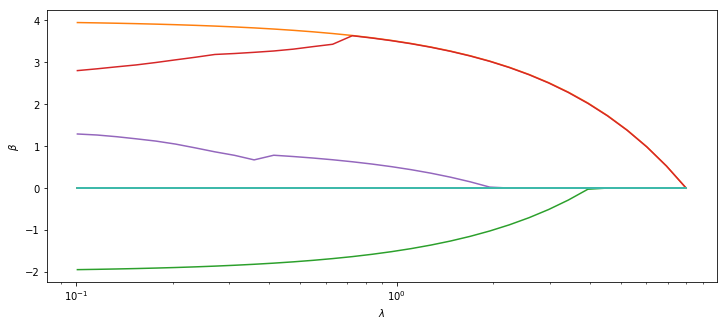

In [5]:
graph.figure(figsize=(12, 5))
for j in range(x.shape[1]):
    graph.plot(plasso.paths['lam'], plasso.paths['beta'][:, j])
graph.xlabel(r'$\lambda$')
graph.ylabel(r'$\beta$')
graph.xscale('log')
graph.show()

In [6]:
print(plasso.paths['beta'].shape)
print(plasso.paths['beta'][:, 0].round(2))

print(plasso.beta.round(2))
print(plasso.theta.round(2))

(32, 50)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.    3.95 -1.95  2.8   1.29  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.  ]
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 1.7   0.16  0.15  0.16]
 [ 0.07 -1.    0.06  0.06]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
